# BERT Base - Augmented Data - All Data

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!pip install -q tensorflow==2.8.0

import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.1 MB/s eta 0:00:00
2.8.0


In [ ]:
!pip install -q transformers==4.18.0

import transformers
print(transformers.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 31.0 MB/s eta 0:00:00
4.18.0


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba18 - Testing All Dataset

/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba18 - Testing All Dataset


In [ ]:
!ls

'augJoin - AllDataset - filtered.csv'
'augJoin - AllDataset - unfiltered.csv'
'BERT - All Dataset - base.ipynb'
'BERT - All Dataset - filtered.ipynb'
'BERT - All Dataset - unfiltered.ipynb'
'Copy of BiLSTM - GoEmotion - base.ipynb'
'Copy of BiLSTM - GoEmotion - filtered.ipynb'
'Copy of BiLSTM - GoEmotion - unfiltered.ipynb'
'Copy of LSTM - GoEmotion - base.ipynb'
'Copy of LSTM - GoEmotion - filtered.ipynb'
'Copy of LSTM - GoEmotion - unfiltered.ipynb'
 dataset.csv
'RoBERTa - All Dataset - base.ipynb'
'RoBERTa - All Dataset - filtered.ipynb'
'RoBERTa - All Dataset - unfiltered.ipynb'


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

dataset = pd.read_csv("dataset.csv", index_col=0, encoding="utf-8")
dataset

,Text,Emotion
0,Thanks! I'm glad you got a kick out of it.,joy
1,I'm more surprised the dash cam was functionin...,surprise
2,i dont know how i feel about my beloved teams ...,love
3,when i learnt that my best friend had failed t...,anger
4,i feel as though that talking for a month is a...,joy
...,...,...
65023,I love truck drivers!!,love
65024,I knew I'd see him here eventually. I really l...,joy
65025,Nope what’s it about?,surprise
65026,Removed and warned. R1,anger


In [ ]:
dataset = dataset.rename({'Emotion': 'emotion', 'Text': 'text'}, axis=1)  # new method

In [ ]:
dataset.head()

,text,emotion
0,Thanks! I'm glad you got a kick out of it.,joy
1,I'm more surprised the dash cam was functionin...,surprise
2,i dont know how i feel about my beloved teams ...,love
3,when i learnt that my best friend had failed t...,anger
4,i feel as though that talking for a month is a...,joy


In [ ]:
dataset['emotion'].value_counts().sort_index()

anger       10793
disgust      5301
fear         5570
joy         14744
love         9832
sadness     12555
surprise     6233
Name: emotion, dtype: int64

In [ ]:
dataset.isnull().value_counts()

text   emotion
False  False      65028
dtype: int64

In [ ]:
dataset = dataset[dataset.emotion != 'love']

In [ ]:
dataset['emotion'].value_counts().sort_index()

anger       10793
disgust      5301
fear         5570
joy         14744
sadness     12555
surprise     6233
Name: emotion, dtype: int64

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['emotion_encode'] = le.fit_transform(dataset['emotion'])
dataset.head()

,text,emotion,emotion_encode
0,Thanks! I'm glad you got a kick out of it.,joy,3
1,I'm more surprised the dash cam was functionin...,surprise,5
3,when i learnt that my best friend had failed t...,anger,0
4,i feel as though that talking for a month is a...,joy,3
5,i feel like the addition of sweet fresh corn r...,joy,3


In [ ]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_mapping)

{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'sadness': 4, 'surprise': 5}


In [ ]:
LABEL_NAME = le.classes_
print(LABEL_NAME)

['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']


In [ ]:
emotion_col = dataset.pop("emotion")
emotion_col

0             joy
1        surprise
3           anger
4             joy
5             joy
           ...   
65022       anger
65024         joy
65025    surprise
65026       anger
65027       anger
Name: emotion, Length: 55196, dtype: object

In [ ]:
dataset

,text,emotion_encode
0,Thanks! I'm glad you got a kick out of it.,3
1,I'm more surprised the dash cam was functionin...,5
3,when i learnt that my best friend had failed t...,0
4,i feel as though that talking for a month is a...,3
5,i feel like the addition of sweet fresh corn r...,3
...,...,...
65022,I had smoothies in the past with these packets...,0
65024,I knew I'd see him here eventually. I really l...,3
65025,Nope what’s it about?,5
65026,Removed and warned. R1,0


# Train, Test, Validation Data Splitting

In [ ]:
import numpy as np

train_data, val_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
train_data = train_data.reset_index().drop(['index'], axis=1)

In [ ]:
train_data['emotion_encode'].value_counts()

3    11762
4    10088
0     8602
5     4987
2     4476
1     4241
Name: emotion_encode, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data['emotion_encode'].value_counts()

3    1490
4    1225
0    1092
5     621
2     548
1     544
Name: emotion_encode, dtype: int64

In [ ]:
val_data = val_data.reset_index().drop(['index'], axis=1)

In [ ]:
val_data['emotion_encode'].value_counts()

3    1492
4    1242
0    1099
5     625
2     546
1     516
Name: emotion_encode, dtype: int64

In [ ]:
train_data.shape, test_data.shape, val_data.shape

((44156, 2), (5520, 2), (5520, 2))

# Model 

In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'roberta-base'

In [ ]:
from transformers import RobertaTokenizer

bert_tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

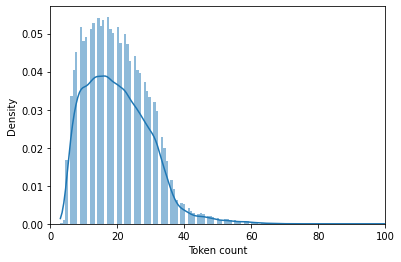

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in train_data.text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 80

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(train_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(val_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFRobertaForSequenceClassification

# Load model
bert_model = TFRobertaForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
1380/1380 [==============================] - 738s 521ms/step - loss: 0.8582 - accuracy: 0.6922 - val_loss: 0.6429 - val_accuracy: 0.7745
Epoch 2/5
1380/1380 [==============================] - 717s 520ms/step - loss: 0.6276 - accuracy: 0.7776 - val_loss: 0.6145 - val_accuracy: 0.7835
Epoch 3/5
1380/1380 [==============================] - 716s 519ms/step - loss: 0.5602 - accuracy: 0.7992 - val_loss: 0.6187 - val_accuracy: 0.7822
Epoch 4/5
1380/1380 [==============================] - 716s 519ms/step - loss: 0.5114 - accuracy: 0.8141 - val_loss: 0.6375 - val_accuracy: 0.7781
Epoch 5/5
1380/1380 [==============================] - 716s 519ms/step - loss: 0.4647 - accuracy: 0.8279 - val_loss: 0.6594 - val_accuracy: 0.7788
CPU times: user 39min 6s, sys: 6min 29s, total: 45min 36s
Wall time: 1h 1min 46s


In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

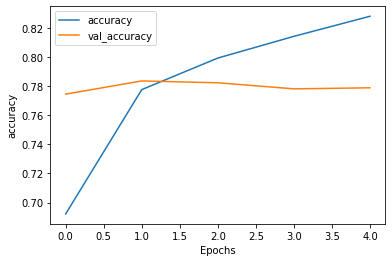

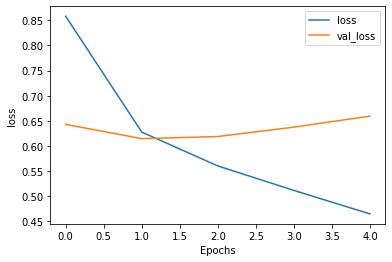

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.692228 	   0.858194 	   0.774457 	   0.642902
       2   0.777561 	   0.627594 	   0.783514 	   0.614505
       3   0.799235 	   0.560165 	   0.782246 	   0.618741
       4   0.814136 	   0.511441 	   0.778080 	   0.637466
       5   0.827928 	   0.464680 	   0.778804 	   0.659403


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

173/173 [==============================] - 30s 171ms/step - loss: 0.6867 - accuracy: 0.7683
Test Accuracy: 0.7682970762252808


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['emotion_encode'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.7682971014492753

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 838,   76,   36,   31,   74,   37],
       [ 164,  240,   49,   19,   52,   20],
       [  34,   28,  409,   10,   49,   18],
       [  37,   15,   16, 1323,   59,   40],
       [  71,   45,   38,   27, 1020,   24],
       [  45,   25,   43,   63,   34,  411]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1092
           1       0.56      0.44      0.49       544
           2       0.69      0.75      0.72       548
           3       0.90      0.89      0.89      1490
           4       0.79      0.83      0.81      1225
           5       0.75      0.66      0.70       621

    accuracy                           0.77      5520
   macro avg       0.73      0.72      0.73      5520
weighted avg       0.77      0.77      0.77      5520

